## imports

In [1]:
import requests
import pandas as pd
import numpy as np
import mysql.connector
import os
import importlib

import data.daily
import sqlalchemy
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from pandas_market_calendars import get_calendar

In [59]:
import data.daily
import algo.option_spread
importlib.reload(algo.option_spread)

<module 'algo.option_spread' from '/home/junlim/projects/volatility_trading/algo/option_spread.py'>

In [2]:
import urllib.parse as urlparse
from urllib.parse import urlencode

In [3]:
import algo.expectation
importlib.reload(algo.expectation)

<module 'algo.expectation' from '/home/junlim/projects/volatility_trading/algo/expectation.py'>

In [4]:
polygon_api_key = os.getenv("QUANT_GALORE_POLYGON_API_KEY")
_POLYGON_V2_BASE_URL = "https://api.polygon.io/v2"
_POLYGON_V3_BASE_URL = "https://api.polygon.io/v3"

In [5]:
calendar = get_calendar("NYSE")
trading_dates = calendar.schedule(
    start_date = "2023-05-01", 
    end_date = "2024-07-02"
    #end_date = (datetime.today()-timedelta(days = 1))
).index.strftime("%Y-%m-%d").values

In [6]:
ticker_spy = "SPY"
ticker_spx = "I:SPX"
ticker_goog = "GOOG"
ticker_sbux = "SBUX"
ticker_vix1d = "I:VIX1D"
options_ticker = "SPX"

i = 2
date = trading_dates[i]
prior_day = trading_dates[i-1]

trade_list = []
times = []

In [7]:
df_spy_daily_history = pd.read_pickle('market_data/df_spy_daily_history.pkl')
df_spx_daily_history = pd.read_pickle('market_data/df_spx_daily_history.pkl')
df_goog_daily_history = pd.read_pickle('market_data/df_goog_daily_history.pkl')
df_sbux_daily_history = pd.read_pickle('market_data/df_sbux_daily_history.pkl')

df_spy_intraday_history = pd.read_pickle('market_data/df_spy_intraday_history.pkl')
df_vix1d_intraday_history = pd.read_pickle('market_data/df_vix1d_intraday_history.pkl')
df_spx_intraday_history = pd.read_pickle('market_data/df_spx_intraday_history.pkl')
df_goog_intraday_history = pd.read_pickle('market_data/df_goog_intraday_history.pkl')
df_sbux_intraday_history = pd.read_pickle('market_data/df_sbux_intraday_history.pkl')

df_spx_call_options_history = pd.read_pickle('market_data/df_spx_call_options_history.pkl')
df_spx_put_options_history = pd.read_pickle('market_data/df_spx_put_options_history.pkl')

In [8]:
df_goog_call_options_history = pd.read_pickle('market_data/df_goog_call_options_history.pkl')

In [56]:
df_spx_otm_call_options_spread_history = pd.read_pickle('market_data/df_spx_otm_call_options_spread_history.pkl')
df_spx_otm_put_options_spread_history = pd.read_pickle('market_data/df_spx_otm_put_options_spread_history.pkl')
df_goog_otm_call_options_spread_history = pd.read_pickle('market_data/df_goog_otm_call_options_spread_history.pkl')
df_goog_otm_put_options_spread_history = pd.read_pickle('market_data/df_goog_otm_put_options_spread_history.pkl')
df_sbux_otm_call_options_spread_history = pd.read_pickle('market_data/df_sbux_otm_call_options_spread_history.pkl')
df_sbux_otm_put_options_spread_history = pd.read_pickle('market_data/df_sbux_otm_put_options_spread_history.pkl')

In [10]:
df_goog_atm_vol_history = pd.read_pickle('market_data/df_goog_atm_vol_history.pkl')
df_sbux_atm_vol_history = pd.read_pickle('market_data/df_sbux_atm_vol_history.pkl')

## debug

In [16]:
import algo.volatility
importlib.reload(algo.volatility)

<module 'algo.volatility' from '/home/junlim/projects/volatility_trading/algo/volatility.py'>

In [17]:
df_goog_atm_vol_history = algo.volatility.get_df_atm_vol_history("GOOG", trading_dates)

/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.
Tolerance of 1108292.8066345474 reached. Failed to converge after 3 iterations, value is -8860.218912937025.
Tolerance of 2738766607.8799853 reached. Failed to converge after 3 iterations, value is -41233161.60149644.
Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.
"None of ['sip_timestamp'] are in the columns"


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.
"None of ['sip_timestamp'] are in the columns"


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.
"None of ['sip_timestamp'] are in the columns"


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.
"None of ['sip_timestamp'] are in the columns"
"None of ['sip_timestamp'] are in the columns"


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.
"None of ['sip_timestamp'] are in the columns"


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


/home/junlim/projects/volatility_trading/algo/volatility.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (math.log(S / K) + (r - q + 0.5 * sigma ** 2) * t) / (sigma * math.sqrt(t))


Tolerance of 0.00014999999999998348 reached. Failed to converge after 1 iterations, value is 0.50015.


In [60]:
import data.polygon
import data.option_contracts
importlib.reload(data.option_contracts)

<module 'data.option_contracts' from '/home/junlim/projects/volatility_trading/data/option_contracts.py'>

In [61]:
df_options_history = df_goog_call_options_history.copy()
df_daily_expectation = df_goog_daily_expectation.copy()
df_otm_options_history = df_options_history.join(df_daily_expectation, on='date')
date_str, option_type = "2024-06-26", "call"

In [62]:
df_otm_options_history = df_otm_options_history[
    df_otm_options_history.strike_price > df_otm_options_history.upper_price
]    

In [63]:
import algo.option_spread
importlib.reload(algo.option_spread)

<module 'algo.option_spread' from '/home/junlim/projects/volatility_trading/algo/option_spread.py'>

In [64]:
algo.option_spread.get_df_otm_options_spread("2024-05-23", df_otm_options_history, "call", tolerance_days=5)

,c_market_o_s_call,c_market_o_l_call,market_o_spread,c_market_c_s_call,c_market_c_l_call,market_c_spread,pnl
t,,,,,,,
2024-05-23,0.23,0.07,0.16,0.03,0.01,0.02,0.14


In [396]:
algo.option_spread.get_df_otm_options_spread_history(df_daily_expectation, df_options_history, "call", ["2024-05-20", "2024-05-21", "2024-05-22", "2024-05-23"], tolerance_days=5)

,c_market_o_s_call,c_market_o_l_call,market_o_spread,c_market_c_s_call,c_market_c_l_call,market_c_spread,pnl
t,,,,,,,
2024-05-20,1.33,0.59,0.74,1.13,0.46,0.67,0.07
2024-05-21,0.85,0.32,0.53,1.42,0.52,0.90,-0.37
2024-05-22,0.85,0.28,0.57,0.69,0.19,0.50,0.07
2024-05-23,0.23,0.07,0.16,0.03,0.01,0.02,0.14


In [65]:
df_goog_otm_call_options_spread_history = algo.option_spread.get_df_otm_options_spread_history(df_daily_expectation, df_options_history, "call", trading_dates, tolerance_days=5)

In [73]:
df_goog_otm_put_options_spread_history = algo.option_spread.get_df_otm_options_spread_history(df_daily_expectation, df_options_history, "put", trading_dates, tolerance_days=5)

In [67]:
df_goog_otm_call_options_spread_history.to_pickle('market_data/df_goog_otm_call_options_spread_history.pkl')

In [74]:
df_goog_otm_put_options_spread_history.to_pickle('market_data/df_goog_otm_put_options_spread_history.pkl')

## logic

In [709]:
df_spy = df_spy_daily_history[["c"]].copy()
df_spy["1_mo_avg"] = df_spy["c"].rolling(window=20).mean()
df_spy["3_mo_avg"] = df_spy["c"].rolling(window=60).mean()
df_spy['regime'] = df_spy.apply(lambda row: 1 if (row['c'] > row['1_mo_avg']) else -1, axis=1)

In [710]:
df_spy_market_open_history = data.daily.get_df_market_open_or_close_history_from_intraday_history(df_spy_intraday_history, "open")
df_vix1d_market_open_history = data.daily.get_df_market_open_or_close_history_from_intraday_history(df_vix1d_intraday_history, "open")
df_spx_market_open_history = data.daily.get_df_market_open_or_close_history_from_intraday_history(df_spx_intraday_history, "open")

In [711]:
df_spx_market_close_history = get_df_market_open_or_close_history_from_intraday_history(df_spx_intraday_history, "close")

In [712]:
df_spx_market_open_close_history = df_spx_market_open_history.join(df_spx_market_close_history, lsuffix="_open", rsuffix="_close")
df_spx_market_open_close_history["actual_change"] = df_spx_market_open_close_history.c_close - df_spx_market_open_close_history.c_open

In [716]:
df_spx_daily_expectation = algo.expectation.get_df_daily_expectation(df_spx_market_open_history, df_spy.regime, df_vix1d_market_open_history / 100, 0.5)

In [717]:
df_spx_daily_expectation_actual = df_spx_daily_expectation.join(df_spx_market_open_close_history["actual_change"])
df_spx_daily_expectation_actual["expected_change_size"] = df_spx_daily_expectation_actual.upper_price - df_spx_daily_expectation_actual.lower_price

In [721]:
df_spx_daily_expectation_actual

,c_market_open,regime,expected_move,lower_price,upper_price,actual_change,expected_change_size
t,,,,,,,
2023-05-02,4153.26,-1,0.0030,4140.80,4165.72,-33.68,24.92
2023-05-03,4125.70,-1,0.0060,4100.95,4150.45,-34.95,49.50
2023-05-04,4081.20,-1,0.0047,4062.02,4100.38,-19.98,38.36
2023-05-05,4104.23,1,0.0041,4087.40,4121.06,32.02,33.66
2023-05-08,4137.65,1,0.0032,4124.41,4150.89,0.47,26.48
...,...,...,...,...,...,...,...
2024-06-26,5457.73,1,0.0024,5444.63,5470.83,20.17,26.20
2024-06-27,5483.08,1,0.0024,5469.92,5496.24,-0.21,26.32
2024-06-28,5496.61,1,0.0028,5481.22,5512.00,-36.13,30.78


/var/folders/hh/x43xkncs2k7dm7t4vg3lt2cm0000gn/T/ipykernel_96764/3319082594.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 50], [0, 50], 'k-', color = 'r')


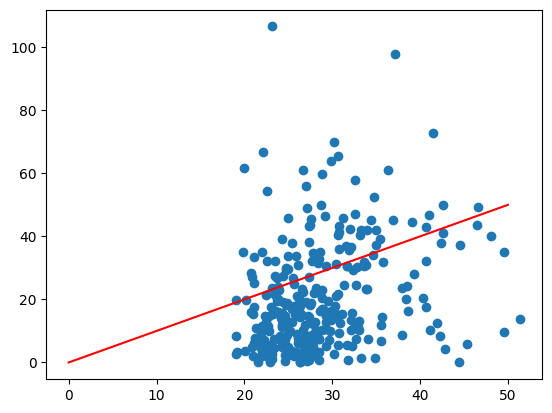

In [723]:
plt.figure()
plt.scatter(df_spx_daily_expectation_actual[["expected_change_size"]], df_spx_daily_expectation_actual[["actual_change"]].abs())
plt.plot([0, 50], [0, 50], 'k-', color = 'r')

/var/folders/hh/x43xkncs2k7dm7t4vg3lt2cm0000gn/T/ipykernel_96764/3531173125.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([-50, 50], [-50, 50], 'k-', color = 'r')


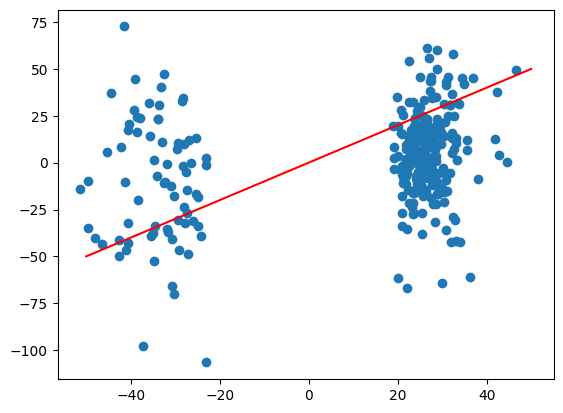

In [788]:
plt.scatter(df_spx_daily_expectation_actual["regime"] * df_spx_daily_expectation_actual["expected_change_size"], df_spx_daily_expectation_actual[["actual_change"]])
plt.plot([-50, 50], [-50, 50], 'k-', color = 'r')

## goog logic

In [40]:
df_goog = df_goog_daily_history[["c"]].copy()
df_goog["1_mo_avg"] = df_goog["c"].rolling(window=20).mean()
df_goog["3_mo_avg"] = df_goog["c"].rolling(window=60).mean()
df_goog['regime'] = df_goog.apply(lambda row: 1 if (row['c'] > row['1_mo_avg']) else -1, axis=1)

In [45]:
df_goog_market_open_history = data.daily.get_df_market_open_or_close_history_from_intraday_history(df_goog_intraday_history, "open")
df_goog_market_close_history = data.daily.get_df_market_open_or_close_history_from_intraday_history(df_goog_intraday_history, "close")
df_goog_market_open_close_history = df_goog_market_open_history.join(df_goog_market_close_history, lsuffix="_open", rsuffix="_close")
df_goog_market_open_close_history["actual_change"] = df_goog_market_open_close_history.c_close - df_goog_market_open_close_history.c_open

In [46]:
df_goog_daily_expectation = algo.expectation.get_df_daily_expectation(
    df_goog_market_open_history, df_goog.regime, 
    (df_goog_atm_vol_history.atm_call_vol + df_goog_atm_vol_history.atm_put_vol) / 2, 
    0.5)

In [47]:
df_goog_daily_expectation_actual = df_goog_daily_expectation.join(df_goog_market_open_close_history["actual_change"])
df_goog_daily_expectation_actual["expected_change_size"] = df_goog_daily_expectation_actual.upper_price - df_goog_daily_expectation_actual.lower_price

/tmp/ipykernel_51020/998933240.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 10], [0, 10], 'k-', color = 'r')


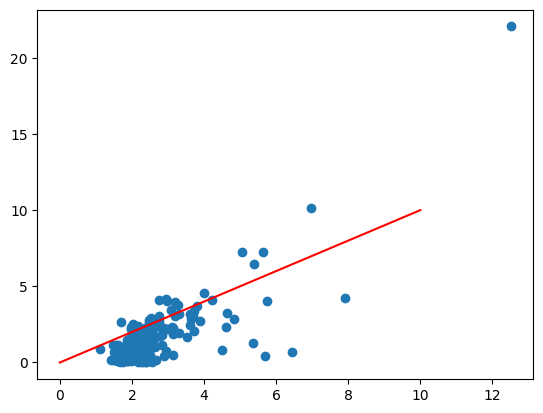

In [48]:
plt.scatter(df_goog_daily_expectation_actual[["expected_change_size"]], df_goog_daily_expectation_actual[["actual_change"]].abs())
plt.plot([0, 10], [0, 10], 'k-', color = 'r')

/var/folders/hh/x43xkncs2k7dm7t4vg3lt2cm0000gn/T/ipykernel_96764/2614324189.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([-10, 10], [-10, 10], 'k-', color = 'r')


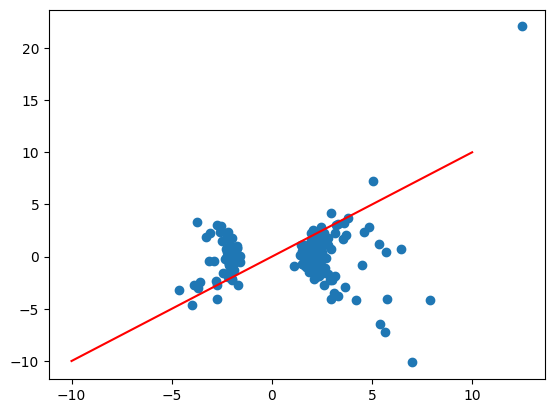

In [793]:
plt.scatter(df_goog_daily_expectation_actual["regime"] * df_goog_daily_expectation_actual["expected_change_size"], df_goog_daily_expectation_actual[["actual_change"]])
plt.plot([-10, 10], [-10, 10], 'k-', color = 'r')

## min max level logic

### goog

In [24]:
df_goog_atm_vol_history['atm_vol'] = (df_goog_atm_vol_history['atm_call_vol'] + df_goog_atm_vol_history['atm_put_vol']) / 2.0

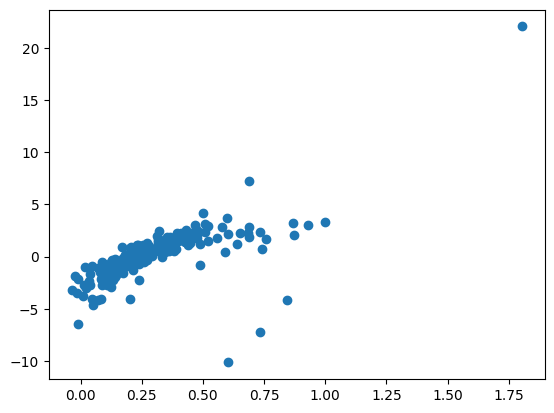

In [219]:
df_goog_atm_call_vol_actual_change = df_goog_atm_vol_history[['atm_call_vol']].join(df_goog_market_open_close_history[['actual_change']])
plt.scatter(df_goog_atm_call_vol_actual_change[["atm_call_vol"]], df_goog_atm_call_vol_actual_change[["actual_change"]])
#plt.plot([-1, 1], [-1, 1], 'k-', color = 'r')

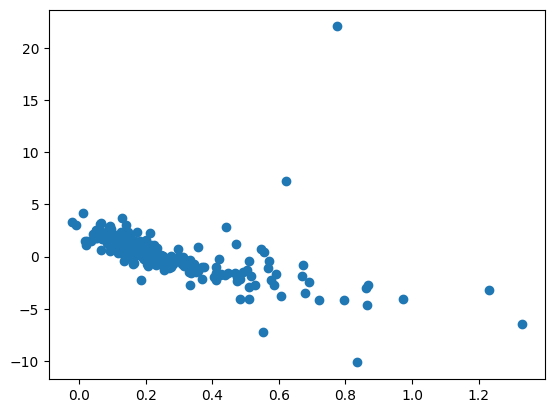

In [220]:
df_goog_atm_put_vol_actual_change = df_goog_atm_vol_history[['atm_put_vol']].join(df_goog_market_open_close_history[['actual_change']])
plt.scatter(df_goog_atm_put_vol_actual_change[["atm_put_vol"]], df_goog_atm_put_vol_actual_change[["actual_change"]])
#plt.plot([-1, 1], [-1, 1], 'k-', color = 'r')

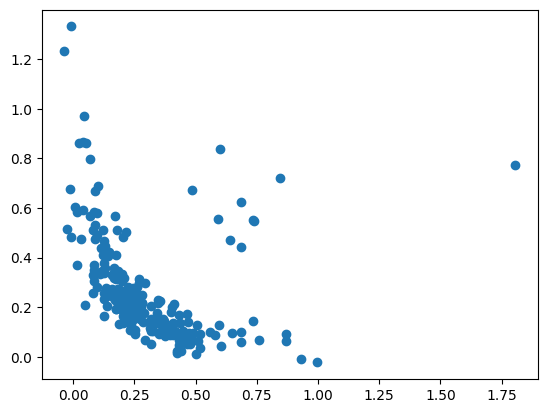

In [223]:
plt.scatter(df_goog_atm_vol_history[["atm_call_vol"]], df_goog_atm_vol_history[["atm_put_vol"]])

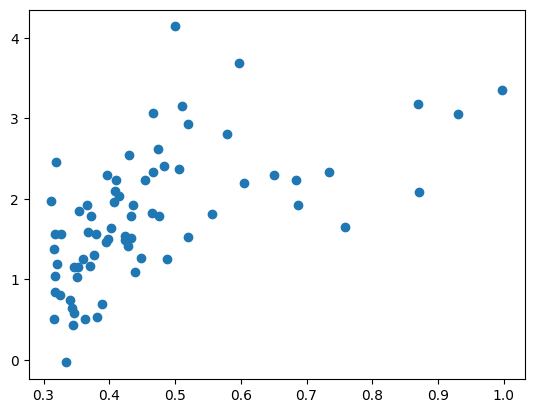

In [252]:
large_vol_threshold = 0.3
df_goog_large_atm_call_vol_history = df_goog_atm_vol_history[
    (df_goog_atm_vol_history.atm_call_vol > large_vol_threshold) &
    (df_goog_atm_vol_history.atm_put_vol < large_vol_threshold)
]
df_goog_large_atm_call_vol_atm_actual_change = df_goog_large_atm_call_vol_history[['atm_call_vol']].join(df_goog_market_open_close_history[['actual_change']])
plt.scatter(df_goog_large_atm_call_vol_atm_actual_change[["atm_call_vol"]], df_goog_large_atm_call_vol_atm_actual_change[["actual_change"]])

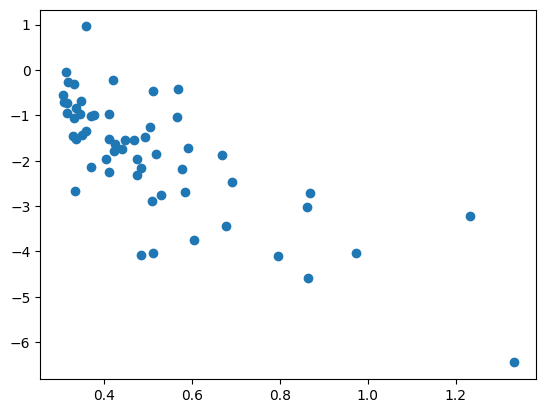

In [253]:
large_vol_threshold = 0.3
df_goog_large_atm_put_vol_history = df_goog_atm_vol_history[
    (df_goog_atm_vol_history.atm_call_vol < large_vol_threshold) &
    (df_goog_atm_vol_history.atm_put_vol > large_vol_threshold)
]
df_goog_large_atm_put_vol_atm_actual_change = df_goog_large_atm_put_vol_history[['atm_put_vol']].join(df_goog_market_open_close_history[['actual_change']])
plt.scatter(df_goog_large_atm_put_vol_atm_actual_change[["atm_put_vol"]], df_goog_large_atm_put_vol_atm_actual_change[["actual_change"]])

/tmp/ipykernel_9519/2116876228.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([-1, 1], [-1, 1], 'k-', color = 'r')


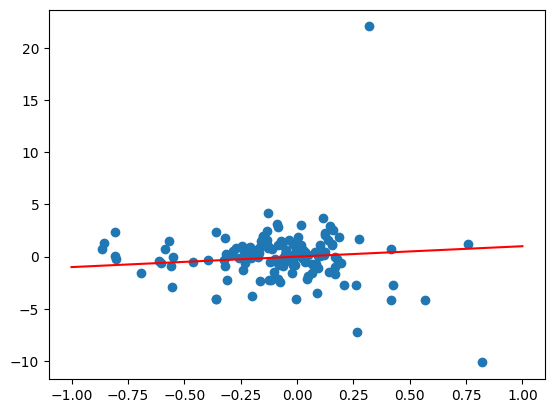

In [233]:
rolling_size = 90
df_goog_atm_vol_min_max_history = df_goog_atm_vol_history.join(df_goog_atm_vol_history[['atm_vol']].rolling(rolling_size).min().join(df_goog_atm_vol_history[['atm_vol']].rolling(rolling_size).max(), lsuffix="_min", rsuffix="_max"))
df_goog_atm_vol_min_max_history['atm_vol_level'] = (df_goog_atm_vol_min_max_history.atm_vol - df_goog_atm_vol_min_max_history.atm_vol_min) / (df_goog_atm_vol_min_max_history.atm_vol_max - df_goog_atm_vol_min_max_history.atm_vol_min)
df_vix1d_market_open_min_max_history = df_vix1d_market_open_history.join(df_vix1d_market_open_history.rolling(rolling_size).min().join(df_vix1d_market_open_history.rolling(rolling_size).max(), lsuffix="_min", rsuffix="_max"))
df_vix1d_market_open_min_max_history['vix_level'] = (df_vix1d_market_open_min_max_history.c - df_vix1d_market_open_min_max_history.c_min) / (df_vix1d_market_open_min_max_history.c_max - df_vix1d_market_open_min_max_history.c_min)

df_vix1d_goog_vol_min_max_history = df_goog_atm_vol_min_max_history[['atm_vol_level']].join(df_vix1d_market_open_min_max_history[['vix_level']])
df_vix1d_goog_vol_min_max_history['atm_minus_vix_level'] = df_vix1d_goog_vol_min_max_history.atm_vol_level - df_vix1d_goog_vol_min_max_history.vix_level
df_vix1d_goog_vol_min_max_actual_history = df_vix1d_goog_vol_min_max_history.join(df_goog_market_open_close_history["actual_change"])

plt.scatter(df_vix1d_goog_vol_min_max_actual_history[["atm_minus_vix_level"]], df_vix1d_goog_vol_min_max_actual_history[["actual_change"]])
plt.plot([-1, 1], [-1, 1], 'k-', color = 'r')

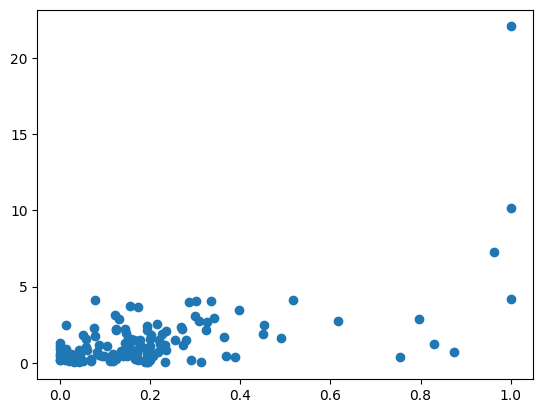

In [234]:
df_goog_atm_vol_level_actual_change = df_goog_atm_vol_min_max_history[['atm_vol_level']].join(df_goog_market_open_close_history[['actual_change']])
plt.scatter(df_goog_atm_vol_level_actual_change[["atm_vol_level"]], df_goog_atm_vol_level_actual_change[["actual_change"]].abs())
#plt.plot([-1, 1], [-1, 1], 'k-', color = 'r')

### sbux

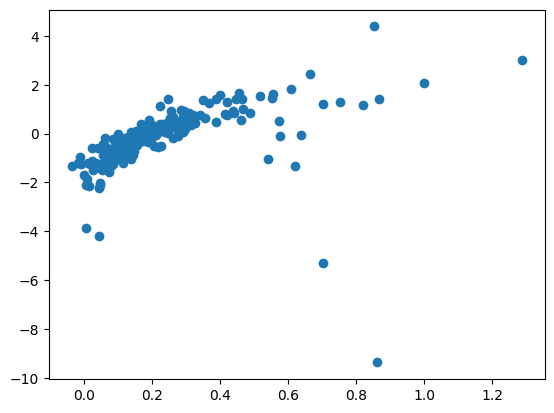

In [224]:
df_sbux_atm_call_vol_actual_change = df_sbux_atm_vol_history[['atm_call_vol']].join(df_sbux_market_open_close_history[['actual_change']])
plt.scatter(df_sbux_atm_call_vol_actual_change[["atm_call_vol"]], df_sbux_atm_call_vol_actual_change[["actual_change"]])
#plt.plot([-1, 1], [-1, 1], 'k-', color = 'r')

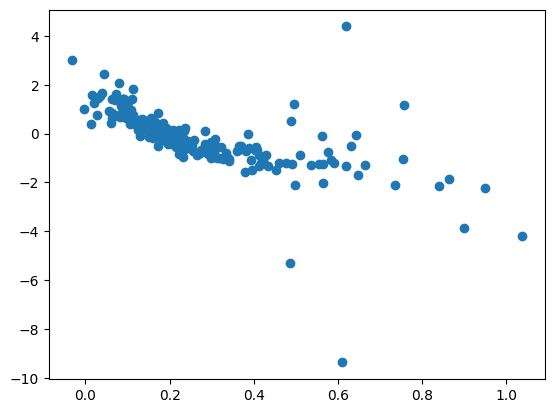

In [225]:
df_sbux_atm_put_vol_actual_change = df_sbux_atm_vol_history[['atm_put_vol']].join(df_sbux_market_open_close_history[['actual_change']])
plt.scatter(df_sbux_atm_put_vol_actual_change[["atm_put_vol"]], df_sbux_atm_put_vol_actual_change[["actual_change"]])
#plt.plot([-1, 1], [-1, 1], 'k-', color = 'r')

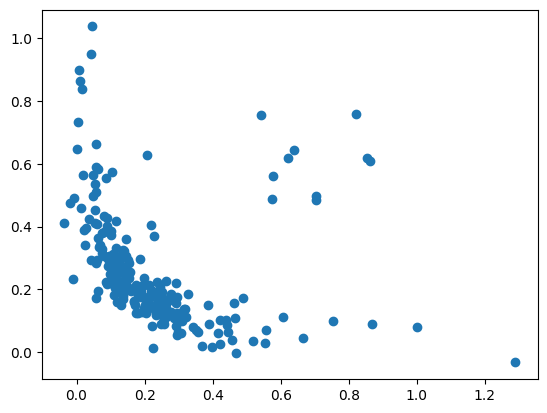

In [226]:
plt.scatter(df_sbux_atm_vol_history[["atm_call_vol"]], df_sbux_atm_vol_history[["atm_put_vol"]])

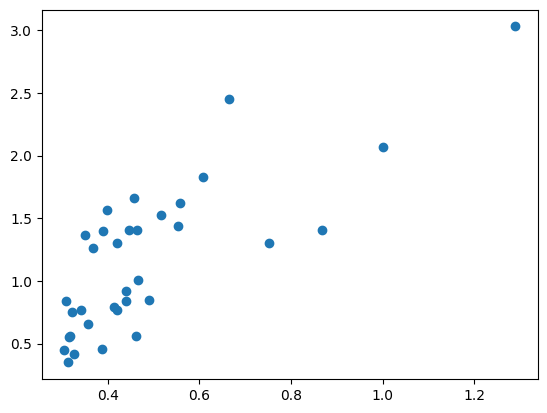

In [891]:
large_vol_threshold = 0.3
df_sbux_large_atm_call_vol_history = df_sbux_atm_vol_history[
    (df_sbux_atm_vol_history.atm_call_vol > large_vol_threshold) &
    (df_sbux_atm_vol_history.atm_put_vol < large_vol_threshold)
]
df_sbux_large_atm_call_vol_atm_actual_change = df_sbux_large_atm_call_vol_history[['atm_call_vol']].join(df_sbux_market_open_close_history[['actual_change']])
plt.scatter(df_sbux_large_atm_call_vol_atm_actual_change[["atm_call_vol"]], df_sbux_large_atm_call_vol_atm_actual_change[["actual_change"]])

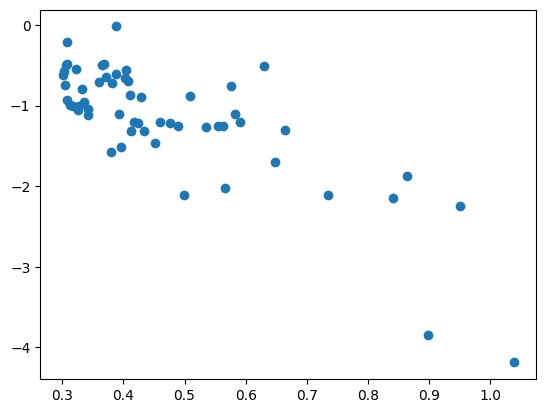

In [895]:
large_vol_threshold = 0.3
df_sbux_large_atm_put_vol_history = df_sbux_atm_vol_history[
    (df_sbux_atm_vol_history.atm_call_vol < large_vol_threshold) &
    (df_sbux_atm_vol_history.atm_put_vol > large_vol_threshold)
]
df_sbux_large_atm_put_vol_atm_actual_change = df_sbux_large_atm_put_vol_history[['atm_put_vol']].join(df_sbux_market_open_close_history[['actual_change']])
plt.scatter(df_sbux_large_atm_put_vol_atm_actual_change[["atm_put_vol"]], df_sbux_large_atm_put_vol_atm_actual_change[["actual_change"]])

/var/folders/hh/x43xkncs2k7dm7t4vg3lt2cm0000gn/T/ipykernel_96764/870103466.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([-1, 1], [-1, 1], 'k-', color = 'r')


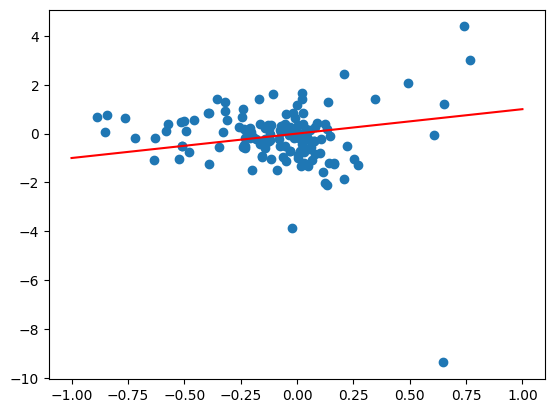

In [869]:
rolling_size = 90
df_sbux_atm_vol_history['atm_vol'] = (df_sbux_atm_vol_history.atm_call_vol + df_sbux_atm_vol_history.atm_put_vol) / 2.0
df_sbux_atm_vol_min_max_history = df_sbux_atm_vol_history.join(df_sbux_atm_vol_history[['atm_vol']].rolling(rolling_size).min().join(df_sbux_atm_vol_history[['atm_vol']].rolling(rolling_size).max(), lsuffix="_min", rsuffix="_max"))
df_sbux_atm_vol_min_max_history['atm_vol_level'] = (df_sbux_atm_vol_min_max_history.atm_vol - df_sbux_atm_vol_min_max_history.atm_vol_min) / (df_sbux_atm_vol_min_max_history.atm_vol_max - df_sbux_atm_vol_min_max_history.atm_vol_min)
df_vix1d_market_open_min_max_history = df_vix1d_market_open_history.join(df_vix1d_market_open_history.rolling(rolling_size).min().join(df_vix1d_market_open_history.rolling(rolling_size).max(), lsuffix="_min", rsuffix="_max"))
df_vix1d_market_open_min_max_history['vix_level'] = (df_vix1d_market_open_min_max_history.c - df_vix1d_market_open_min_max_history.c_min) / (df_vix1d_market_open_min_max_history.c_max - df_vix1d_market_open_min_max_history.c_min)

df_vix1d_sbux_vol_min_max_history = df_sbux_atm_vol_min_max_history[['atm_vol_level']].join(df_vix1d_market_open_min_max_history[['vix_level']])
df_vix1d_sbux_vol_min_max_history['atm_minus_vix_level'] = df_vix1d_sbux_vol_min_max_history.atm_vol_level - df_vix1d_sbux_vol_min_max_history.vix_level
df_vix1d_sbux_vol_min_max_actual_history = df_vix1d_sbux_vol_min_max_history.join(df_sbux_market_open_close_history["actual_change"])

plt.scatter(df_vix1d_sbux_vol_min_max_actual_history[["atm_minus_vix_level"]], df_vix1d_sbux_vol_min_max_actual_history[["actual_change"]])
plt.plot([-1, 1], [-1, 1], 'k-', color = 'r')

## sbux logic

In [798]:
df_sbux = df_sbux_daily_history[["c"]].copy()
df_sbux["1_mo_avg"] = df_sbux["c"].rolling(window=20).mean()
df_sbux["3_mo_avg"] = df_sbux["c"].rolling(window=60).mean()
df_sbux['regime'] = df_sbux.apply(lambda row: 1 if (row['c'] > row['1_mo_avg']) else -1, axis=1)

In [799]:
df_sbux_market_close_history = get_df_market_open_or_close_history_from_intraday_history(df_sbux_intraday_history, "close")
df_sbux_market_open_close_history = df_sbux_market_open_history.join(df_sbux_market_close_history, lsuffix="_open", rsuffix="_close")
df_sbux_market_open_close_history["actual_change"] = df_sbux_market_open_close_history.c_close - df_sbux_market_open_close_history.c_open

In [800]:
df_sbux_daily_expectation = algo.expectation.get_df_daily_expectation(
    df_sbux_market_open_history, df_sbux.regime, 
    (df_sbux_atm_vol_history.atm_call_vol + df_sbux_atm_vol_history.atm_put_vol) / 2, 
    0.5)

In [801]:
df_sbux_daily_expectation

,c_market_open,regime,expected_move,lower_price,upper_price
t,,,,,
2023-05-02,113.3832,1,0.0187,111.26,115.50
2023-05-03,107.6863,-1,0.0170,105.86,109.52
2023-05-04,104.3100,-1,0.0081,103.47,105.15
2023-05-05,105.4826,-1,NaN,NaN,NaN
2023-05-08,108.0200,-1,0.0061,107.36,108.68
...,...,...,...,...,...
2024-06-26,79.0200,-1,0.0067,78.49,79.55
2024-06-27,78.8800,-1,0.0070,78.33,79.43
2024-06-28,78.5997,-1,NaN,NaN,NaN


In [802]:
df_sbux_daily_expectation_actual = df_sbux_daily_expectation.join(df_sbux_market_open_close_history["actual_change"])
df_sbux_daily_expectation_actual["expected_change_size"] = df_sbux_daily_expectation_actual.upper_price - df_sbux_daily_expectation_actual.lower_price

/var/folders/hh/x43xkncs2k7dm7t4vg3lt2cm0000gn/T/ipykernel_96764/25140229.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([-1, 6], [-1, 6], 'k-', color = 'r')


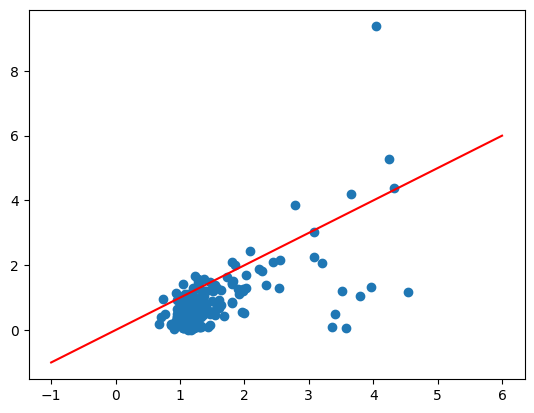

In [864]:
plt.scatter(df_sbux_daily_expectation_actual[["expected_change_size"]], df_sbux_daily_expectation_actual[["actual_change"]].abs())
plt.plot([-1, 6], [-1, 6], 'k-', color = 'r')

/var/folders/hh/x43xkncs2k7dm7t4vg3lt2cm0000gn/T/ipykernel_96764/2474148535.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([-10, 10], [-10, 10], 'k-', color = 'r')


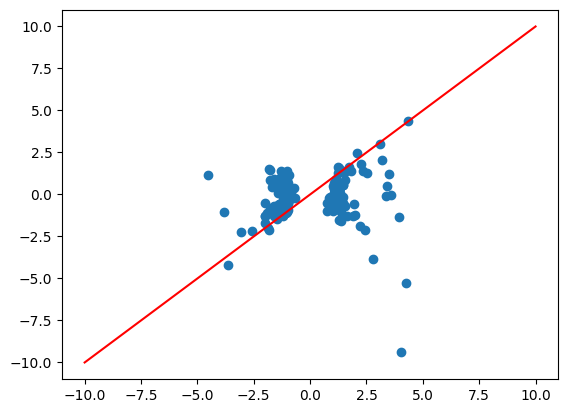

In [804]:
plt.scatter(df_sbux_daily_expectation_actual["regime"] * df_sbux_daily_expectation_actual["expected_change_size"], df_sbux_daily_expectation_actual[["actual_change"]])
plt.plot([-10, 10], [-10, 10], 'k-', color = 'r')

## logic with options data

In [154]:
df_spx_algo = df_spx_daily_expectation.join(df_spx_otm_call_options_spread_history[["pnl"]].add_suffix("_call")).join(
    df_spx_otm_put_options_spread_history[["pnl"]].add_suffix("_put")
)
df_spx_algo['pnl_c_n_reg'] = np.where(df_spx_algo.regime < 0, df_spx_algo.pnl_call, 0)
df_spx_algo['pnl_p_p_reg'] = np.where(df_spx_algo.regime > 0, df_spx_algo.pnl_put, 0)

In [392]:
df_spx_algo

,c_market_open,regime,expected_move,lower_price,upper_price,pnl_call,pnl_put,pnl_c_n_reg,pnl_p_p_reg
t,,,,,,,,,
2023-05-02,4153.26,-1,0.00300,4140.80,4165.72,0.90,-2.16,0.90,0.00
2023-05-03,4125.70,-1,0.00600,4100.95,4150.45,1.31,-3.62,1.31,0.00
2023-05-04,4081.20,-1,0.00465,4062.22,4100.18,1.10,1.08,1.10,0.00
2023-05-05,4104.23,1,0.00410,4087.40,4121.06,-5.85,1.10,0.00,1.10
2023-05-08,4137.65,1,0.00320,4124.41,4150.89,0.83,0.85,0.00,0.85
...,...,...,...,...,...,...,...,...,...
2024-06-26,5457.73,1,0.00235,5444.90,5470.56,-2.13,0.90,0.00,0.90
2024-06-27,5483.08,1,0.00240,5469.92,5496.24,1.10,0.84,0.00,0.84
2024-06-28,5496.61,1,0.00280,5481.22,5512.00,1.25,-3.76,0.00,-3.76


<AxesSubplot:xlabel='t'>

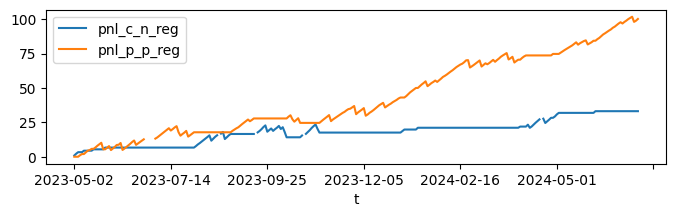

In [390]:
df_spx_algo[["pnl_c_n_reg", "pnl_p_p_reg"]].cumsum().plot(figsize=(8,2))

In [388]:
df_spx_algo.groupby("regime")[["pnl_call", "pnl_put"]].sum()

,pnl_call,pnl_put
regime,,
-1,33.14,-74.90
1,-54.36,100.26


In [157]:
df_spx_otm_call_options_spread_history[
    df_spx_algo["regime"] < 0
].sum()

/var/folders/hh/x43xkncs2k7dm7t4vg3lt2cm0000gn/T/ipykernel_96764/2214457600.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_spx_otm_call_options_spread_history[


c_market_o_s_call    323.67
c_market_o_l_call    239.52
market_o_spread       84.15
c_market_c_s_call    196.58
c_market_c_l_call    145.57
market_c_spread       51.01
pnl                   33.14
dtype: float64

In [158]:
df_spx_otm_call_options_spread_history.sum()

c_market_o_s_call    1047.16
c_market_o_l_call     732.10
market_o_spread       315.06
c_market_c_s_call    1132.63
c_market_c_l_call     796.35
market_c_spread       336.28
pnl                   -21.22
dtype: float64

In [159]:
df_spx_otm_put_options_spread_history[
    df_spx_algo["regime"] > 0
].sum()

/var/folders/hh/x43xkncs2k7dm7t4vg3lt2cm0000gn/T/ipykernel_96764/465159656.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_spx_otm_put_options_spread_history[


c_market_o_s_put    896.91
c_market_o_l_put    668.93
market_o_spread     227.98
c_market_c_s_put    478.88
c_market_c_l_put    351.16
market_c_spread     127.72
pnl                 100.26
dtype: float64

In [160]:
df_spx_otm_put_options_spread_history.sum()

c_market_o_s_put    1306.32
c_market_o_l_put     997.03
market_o_spread      309.29
c_market_c_s_put    1205.80
c_market_c_l_put     921.87
market_c_spread      283.93
pnl                   25.36
dtype: float64

## goog logic with options data

In [75]:
df_goog_algo = df_goog_daily_expectation.join(df_goog_otm_call_options_spread_history[["pnl"]].add_suffix("_call")).join(
    df_goog_otm_put_options_spread_history[["pnl"]].add_suffix("_put")
)
df_goog_algo['pnl_c'] = df_goog_algo.pnl_call
df_goog_algo['pnl_p'] = df_goog_algo.pnl_put
df_goog_algo['pnl_c_n_reg'] = np.where(df_goog_algo.regime < 0, df_goog_algo.pnl_call, 0)
df_goog_algo['pnl_p_p_reg'] = np.where(df_goog_algo.regime > 0, df_goog_algo.pnl_put, 0)

<Axes: xlabel='t'>

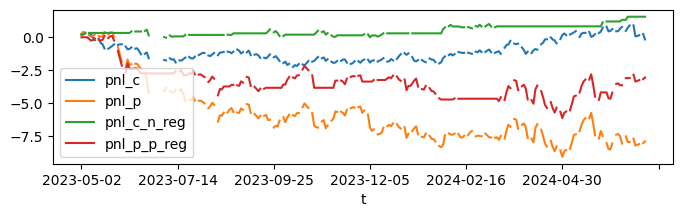

In [76]:
df_goog_algo[["pnl_c", "pnl_p", "pnl_c_n_reg", "pnl_p_p_reg"]].cumsum().plot(figsize=(8,2))

<Axes: xlabel='t'>

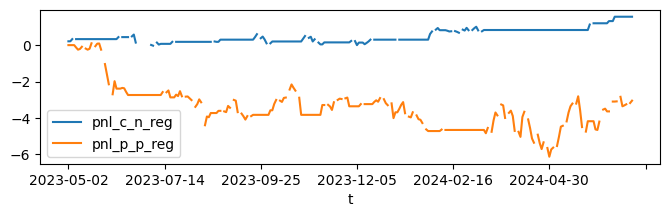

In [77]:
df_goog_algo[["pnl_c_n_reg", "pnl_p_p_reg"]].cumsum().plot(figsize=(8,2))

<AxesSubplot:xlabel='t'>

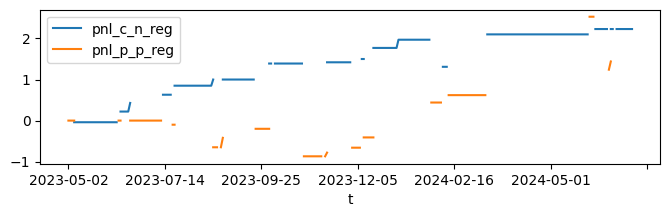

In [795]:
df_goog_algo[["pnl_c_n_reg", "pnl_p_p_reg"]].cumsum().plot(figsize=(8,2))

In [78]:
df_goog_algo.groupby("regime")[["pnl_call", "pnl_put"]].sum()

,pnl_call,pnl_put
regime,,
-1,1.56,-4.85
1,-1.72,-3.05


In [796]:
df_goog_algo.groupby("regime")[["pnl_call", "pnl_put"]].sum()

,pnl_call,pnl_put
regime,,
-1,2.23,2.45
1,2.73,1.80


## sbux logic with options data

In [396]:
df_sbux_algo = df_sbux_daily_expectation.join(df_sbux_otm_call_options_spread_history[["pnl"]].add_suffix("_call")).join(
    df_sbux_otm_put_options_spread_history[["pnl"]].add_suffix("_put")
)
df_sbux_algo['pnl_c_n_reg'] = np.where(df_sbux_algo.regime < 0, df_sbux_algo.pnl_call, 0)
df_sbux_algo['pnl_p_p_reg'] = np.where(df_sbux_algo.regime > 0, df_sbux_algo.pnl_put, 0)

<AxesSubplot:xlabel='t'>

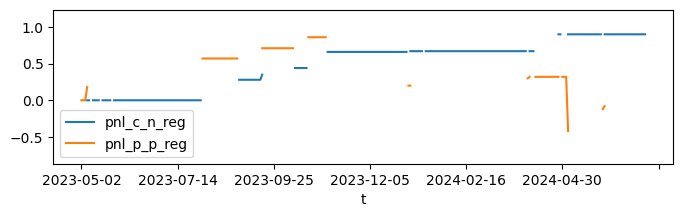

In [397]:
df_sbux_algo[["pnl_c_n_reg", "pnl_p_p_reg"]].cumsum().plot(figsize=(8,2))

In [264]:
df_sbux_algo.groupby("regime")[["pnl_call", "pnl_put"]].sum()

,pnl_call,pnl_put
regime,,
-1,0.90,-0.54
1,-0.14,-0.66


## volatility calc

In [128]:
df_goog_atm_vol_history["expected_move"] = ((df_goog_atm_vol_history.atm_call_vol + df_goog_atm_vol_history.atm_put_vol) / 2 / np.sqrt(252))

In [149]:
df_sbux_atm_vol_history["expected_move"] = ((df_sbux_atm_vol_history.atm_call_vol + df_sbux_atm_vol_history.atm_put_vol) / 2 / np.sqrt(252))

In [732]:
(df_goog_atm_vol_history.atm_call_vol + df_goog_atm_vol_history.atm_put_vol) / 2

date
2023-05-02    0.297181
2023-05-03    0.261481
2023-05-04    0.262665
2023-05-08    0.319597
2023-05-09    0.359917
                ...   
2024-06-25    0.256182
2024-06-26    0.178506
2024-06-27    0.180017
2024-07-01    0.145797
2024-07-02    0.286338
Length: 229, dtype: float64

## debug

In [328]:
ticker = "GOOG"
date = "2024-06-11"
quote_timestamp = (pd.to_datetime(date).tz_localize("America/New_York") + timedelta(hours = 15, minutes = 55)).value
close_timestamp = (pd.to_datetime(date).tz_localize("America/New_York") + timedelta(hours = 16, minutes = 0)).value

In [347]:
price = df_goog_market_open_history.loc[date].c

In [423]:
calls = pd.json_normalize(requests.get(f"https://api.polygon.io/v3/reference/options/contracts?underlying_ticker={ticker}&contract_type=call&as_of={date}&limit=1000&apiKey={polygon_api_key}").json()["results"])

In [424]:
calls["days_to_exp"] = (pd.to_datetime(calls["expiration_date"]) - pd.to_datetime(date)).dt.days
#calls = calls[calls["days_to_exp"] >= 5].copy()
nearest_exp_date = calls["expiration_date"].iloc[0]
calls = calls[calls["expiration_date"] == nearest_exp_date].copy()

In [425]:
nearest_exp_date

'2024-06-14'

In [426]:
calls["distance_from_price"] = abs(round(((calls["strike_price"] - price) / price)*100, 2))

In [444]:
calls.head()

,cfi,contract_type,exercise_style,expiration_date,primary_exchange,shares_per_contract,strike_price,ticker,underlying_ticker,days_to_exp,distance_from_price
0,OCASPS,call,american,2024-06-14,BATO,100,85.0,O:GOOG240614C00085000,GOOG,3,52.15
1,OCASPS,call,american,2024-06-14,BATO,100,90.0,O:GOOG240614C00090000,GOOG,3,49.34
2,OCASPS,call,american,2024-06-14,BATO,100,95.0,O:GOOG240614C00095000,GOOG,3,46.52
3,OCASPS,call,american,2024-06-14,BATO,100,100.0,O:GOOG240614C00100000,GOOG,3,43.71
4,OCASPS,call,american,2024-06-14,BATO,100,105.0,O:GOOG240614C00105000,GOOG,3,40.89


In [428]:
atm_call = calls.nsmallest(1, "distance_from_price")

In [429]:
atm_call

,cfi,contract_type,exercise_style,expiration_date,primary_exchange,shares_per_contract,strike_price,ticker,underlying_ticker,days_to_exp,distance_from_price
27,OCASPS,call,american,2024-06-14,BATO,100,177.5,O:GOOG240614C00177500,GOOG,3,0.08


In [430]:
call_quotes = pd.json_normalize(requests.get(f"https://api.polygon.io/v3/quotes/{atm_call['ticker'].iloc[0]}?timestamp.gte={quote_timestamp}&timestamp.lt={close_timestamp}&order=desc&limit=100&sort=timestamp&apiKey={polygon_api_key}").json()["results"]).set_index("sip_timestamp")
call_quotes.index = pd.to_datetime(call_quotes.index, unit = "ns", utc = True).tz_convert("America/New_York")
call_quotes["mid_price"] = round((call_quotes["bid_price"] + call_quotes["ask_price"]) / 2, 2)

In [432]:
time_to_expiration = atm_call.days_to_exp.values[0] / 252

In [433]:
atm_call_vol = call_implied_vol(S=price, K=atm_call["strike_price"].iloc[0], t=time_to_expiration, r=.045, option_price=call_quotes["mid_price"].iloc[0])

In [434]:
atm_call_vol

0.240868986287512

In [ ]:
puts = pd.json_normalize(requests.get(f"https://api.polygon.io/v3/reference/options/contracts?underlying_ticker={ticker}&contract_type=put&as_of={date}&limit=1000&apiKey={polygon_api_key}").json()["results"])
puts["days_to_exp"] = (pd.to_datetime(puts["expiration_date"]) - pd.to_datetime(date)).dt.days
puts = puts[puts["expiration_date"] == nearest_exp_date].copy()
puts["distance_from_price"] = abs(round(((price - puts["strike_price"]) / puts["strike_price"])*100, 2))
atm_put = puts.nsmallest(1, "distance_from_price")

In [435]:
puts = pd.json_normalize(requests.get(f"https://api.polygon.io/v3/reference/options/contracts?underlying_ticker={ticker}&contract_type=put&as_of={date}&limit=1000&apiKey={polygon_api_key}").json()["results"])

In [436]:
puts["days_to_exp"] = (pd.to_datetime(puts["expiration_date"]) - pd.to_datetime(date)).dt.days
puts = puts[puts["expiration_date"] == nearest_exp_date].copy()

In [437]:
puts["distance_from_price"] = abs(round(((price - puts["strike_price"]) / puts["strike_price"])*100, 2))

In [438]:
atm_put = puts.nsmallest(1, "distance_from_price")

In [439]:
atm_put

,cfi,contract_type,exercise_style,expiration_date,primary_exchange,shares_per_contract,strike_price,ticker,underlying_ticker,days_to_exp,distance_from_price
27,OPASPS,put,american,2024-06-14,BATO,100,177.5,O:GOOG240614P00177500,GOOG,3,0.08


In [440]:
put_quotes = pd.json_normalize(requests.get(f"https://api.polygon.io/v3/quotes/{atm_put['ticker'].iloc[0]}?timestamp.gte={quote_timestamp}&timestamp.lt={close_timestamp}&order=desc&limit=100&sort=timestamp&apiKey={polygon_api_key}").json()["results"]).set_index("sip_timestamp")
put_quotes.index = pd.to_datetime(put_quotes.index, unit = "ns", utc = True).tz_convert("America/New_York")
put_quotes["mid_price"] = round((put_quotes["bid_price"] + put_quotes["ask_price"]) / 2, 2)

In [441]:
atm_put_vol = put_implied_vol(S=price, K=atm_put["strike_price"].iloc[0], t=time_to_expiration, r=.045, option_price=put_quotes["mid_price"].iloc[0])

In [442]:
atm_put_vol

0.1921287338318709

In [443]:
atm_vol = round(((atm_call_vol + atm_put_vol) / 2)*100, 2)
expected_move = (round((atm_vol / np.sqrt(252)), 2))

In [ ]:

end_time = datetime.now()
seconds_to_complete = (end_time - start_time).total_seconds()
times.append(seconds_to_complete)
iteration = round((np.where(trading_dates==date)[0][0]/len(trading_dates))*100,2)
iterations_remaining = len(trading_dates) - np.where(trading_dates==date)[0][0]
average_time_to_complete = np.mean(times)
estimated_completion_time = (datetime.now() + timedelta(seconds = int(average_time_to_complete*iterations_remaining)))
time_remaining = estimated_completion_time - datetime.now()
print(f"{iteration}% complete, {time_remaining} left, ETA: {estimated_completion_time}")
